In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
plt.style.use('seaborn')
from neural_network import Model

In [2]:
file_name = 'energy_efficiency_data.csv'
data = pd.read_csv(file_name)
data

,# Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
3,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
4,0.90,563.5,318.5,122.50,7.0,3.0,0.0,0.0,21.46,25.38
...,...,...,...,...,...,...,...,...,...,...
763,0.71,710.5,269.5,220.50,3.5,2.0,0.4,5.0,12.43,15.59
764,0.69,735.0,294.0,220.50,3.5,3.0,0.4,5.0,14.28,15.87
765,0.66,759.5,318.5,220.50,3.5,4.0,0.4,5.0,14.92,17.55
766,0.64,784.0,343.0,220.50,3.5,3.0,0.4,5.0,18.19,20.21


In [3]:
y_data = data['Heating Load'].to_numpy().reshape(-1, 1)
y_data.shape

(768, 1)

In [4]:
data = data.drop('Heating Load', axis = 'columns')
print('unique of Orientation',data['Orientation'].unique())
print('unique of GAD',data['Glazing Area Distribution'].unique())

unique of Orientation [2. 4. 5. 3.]
unique of GAD [0. 1. 2. 3. 4. 5.]


In [5]:
category_1 = data['Orientation'].to_numpy(dtype = np.int32)
category_2 = data['Glazing Area Distribution'].to_numpy(dtype = np.int32)
one_hot_1 = np.zeros((category_1.shape[0], 4))
one_hot_2 = np.zeros((category_1.shape[0], 6))
for i in range(category_1.shape[0]):
    one_hot_1[i,category_1[i] - 2] = 1
    one_hot_2[i,category_2[i]] = 1
one_hot_1

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [6]:
x_data = data.drop(['Orientation','Glazing Area Distribution'], axis = 'columns').to_numpy()
print(x_data.shape)
x_data = np.concatenate((x_data,one_hot_1,one_hot_2),axis=1)
print(x_data.shape)

(768, 7)
(768, 17)


In [7]:
#60% for training, 15% val, 25% test
train_bound = int(np.ceil(0.6*len(x_data)))
val_bound = int(np.ceil(0.75*len(x_data)))
indice = np.arange(len(x_data))
np.random.shuffle(indice)
x_data = x_data[indice]
y_data = y_data[indice]
train_x = x_data[:train_bound]
train_y = y_data[:train_bound]
val_x = x_data[train_bound:val_bound]
val_y = y_data[train_bound:val_bound]
test_x = x_data[val_bound:]
test_y = y_data[val_bound:]
print(train_x.shape, val_x.shape, test_x.shape)

(461, 17) (115, 17) (192, 17)


In [8]:
model = Model(17, 'mean_squared_error', 1e-8)
model.add(16, activation = 'relu')
model.add(16, activation = 'relu')
model.add(1)

epoch: 1|20, loss:274200.378, performance:24.388, val_performance:24.759
epoch: 2|20, loss:273957.161, performance:24.378, val_performance:24.748
epoch: 3|20, loss:273694.62, performance:24.366, val_performance:24.737
epoch: 4|20, loss:273374.382, performance:24.352, val_performance:24.723
epoch: 5|20, loss:272913.997, performance:24.331, val_performance:24.703
epoch: 6|20, loss:272101.727, performance:24.295, val_performance:24.668
epoch: 7|20, loss:270341.373, performance:24.216, val_performance:24.591
epoch: 8|20, loss:265076.518, performance:23.979, val_performance:24.364
epoch: 9|20, loss:240809.286, performance:22.855, val_performance:23.284
epoch:10|20, loss:100529.183, performance:14.767, val_performance:15.662
epoch:11|20, loss:49639.113, performance:10.377, val_performance:12.205
epoch:12|20, loss:50680.264, performance:10.485, val_performance:12.214
epoch:13|20, loss:49035.34, performance:10.313, val_performance:12.2
epoch:14|20, loss:50113.349, performance:10.426, val_perfo

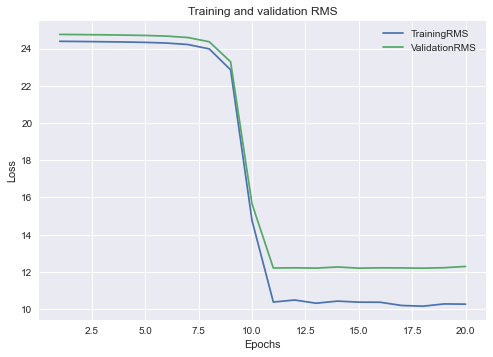

In [9]:
model.fit(train_x, train_y, 20, 32, True, val_x , val_y)

11.563783229566326


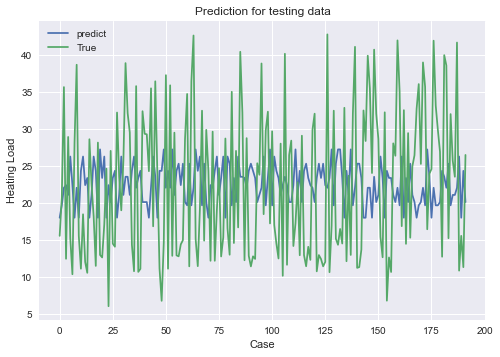

In [10]:
y_pred = model.predict(test_x)
print(model.evaluate_performance(y_pred, test_y))
plt.plot(y_pred, label = 'predict')
plt.plot(test_y, label = 'True')
plt.title('Prediction for testing data')
plt.xlabel('Case')
plt.ylabel('Heating Load')
plt.legend()
plt.show()

In [11]:
# delete features: Orientation, Glazing Area Distribution, Overall Height, Glazing Area
data_fs = data.drop(
    ['Orientation','Glazing Area Distribution','Overall Height','Glazing Area']
    , axis = 'columns').to_numpy()
# Don't use validation this time
train_x = data_fs[:val_bound]
train_y = y_data[:val_bound]
test_x = data_fs[val_bound:]
test_y = y_data[val_bound:]
print(train_x.shape)

(576, 5)


epoch: 1|12, loss:344329.392, performance:24.45
epoch: 2|12, loss:343730.297, performance:24.429
epoch: 3|12, loss:342682.272, performance:24.391
epoch: 4|12, loss:340007.624, performance:24.296
epoch: 5|12, loss:328785.612, performance:23.892
epoch: 6|12, loss:229244.872, performance:19.95
epoch: 7|12, loss:63073.378, performance:10.464
epoch: 8|12, loss:65082.814, performance:10.63
epoch: 9|12, loss:63105.973, performance:10.467
epoch:10|12, loss:62605.696, performance:10.425
epoch:11|12, loss:63459.561, performance:10.496
epoch:12|12, loss:63812.65, performance:10.525


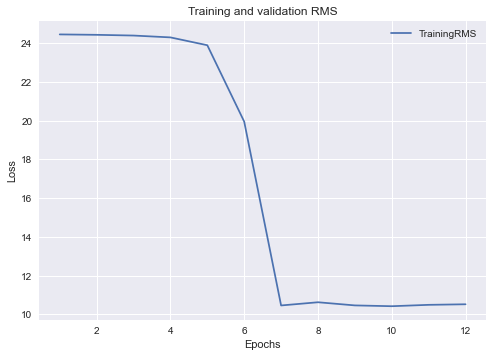

In [14]:
model = Model(5, 'mean_squared_error', 1e-8)
model.add(16, activation = 'relu')
model.add(16, activation = 'relu')
model.add(1)
# According to previous training, we run 12 episodes this time
model.fit(train_x, train_y, 12, 32, False)

10.574521743852841


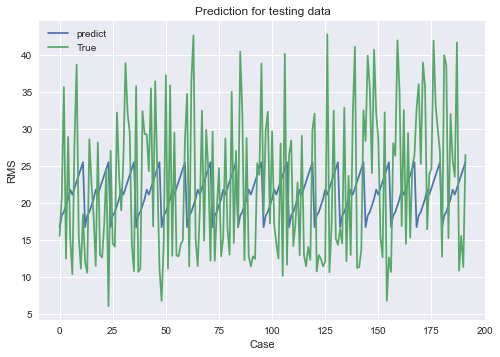

In [15]:
# the result seems better
y_pred = model.predict(test_x)
print(model.evaluate_performance(y_pred, test_y))
plt.plot(y_pred, label = 'predict')
plt.plot(test_y, label = 'True')
plt.title('Prediction for testing data')
plt.xlabel('Case')
plt.ylabel('RMS')
plt.legend()
plt.show()